<a href="https://colab.research.google.com/github/vibhuvanjari-Kellogg/MSDS422-Airlines-Project/blob/main/Final_Project_Part_2_NA_Carrier_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction
Taking the perspective of the CEO of United in August 2015, the goal is to analyze the Skytrax Reviews Dataset to find focus areas for the customer experience.

Link to Part 1 (EDA): https://colab.research.google.com/drive/1e3BaBqnoDy3yb_xvaFqOZJYuhz_YEDMv?usp=sharing

Link to Part 2 (NA Carrier Analysis): https://colab.research.google.com/drive/1_itJ0k2WhjNTh1aKawhtxJn3zaLWCyQV?usp=sharing

Link to Part 3 (Opportunity Analysis): https://colab.research.google.com/drive/1A0AuW30CiUdbjBJzSzLt_p-6sO55sIc_?usp=sharing

### Import modules and data

In [ ]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import statsmodels.formula.api as smf

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Figures inline and set visualization style
%matplotlib inline
sns.set()

# To ensure all columns are displayed when calling data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df_filtered_na = pd.read_csv('df_filtered_na.csv')

In [ ]:
df_filtered_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3261 entries, 0 to 3260
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   airline_name            3261 non-null   object 
 1   link                    3261 non-null   object 
 2   title                   3261 non-null   object 
 3   author                  3261 non-null   object 
 4   author_country          3255 non-null   object 
 5   date                    3261 non-null   object 
 6   content                 3261 non-null   object 
 7   aircraft                143 non-null    object 
 8   type_traveller          335 non-null    object 
 9   cabin_flown             3058 non-null   object 
 10  route                   329 non-null    object 
 11  overall                 3052 non-null   float64
 12  seat_comfort            3098 non-null   float64
 13  cabin_staff             3099 non-null   float64
 14  food_beverages          3047 non-null   

In [ ]:
df_filtered_na.head()

,airline_name,link,title,author,author_country,date,content,aircraft,type_traveller,cabin_flown,route,overall,seat_comfort,cabin_staff,food_beverages,inflight_entertainment,ground_service,wifi_connectivity,value_money,recommended,year,month,day,100pluscount,airline_type,author_subregion,author_region,origin,destination,layover
0,air-canada,/airline-reviews/air-canada,Air Canada customer review,Anu Gunasekera,Canada,2015-07-30,London to Toronto. Flight delayed 5 hrs and no...,Boeing 767,FamilyLeisure,Economy,London Heathrow to Toronto,3.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,0,2015,7,30,1,na_legacy,Northern America,North America,London Heathrow,Toronto,NaN
1,air-canada,/airline-reviews/air-canada,Air Canada customer review,E R Subra,United States,2015-07-29,We had a confirmed booking to fly from Toronto...,NaN,Couple Leisure,Economy,YYZto EWR,1.0,1.0,1.0,1.0,2.0,1.0,NaN,1.0,0,2015,7,29,1,na_legacy,Northern America,North America,Toronto,Newark,NaN
2,air-canada,/airline-reviews/air-canada,Air Canada customer review,Nariner Rakkar,United Kingdom,2015-07-29,I travelled 27th July from Toronto to LHR. Thi...,Boeing 767-300,FamilyLeisure,Economy,YYZ to LHR,1.0,1.0,4.0,2.0,1.0,2.0,NaN,1.0,0,2015,7,29,1,na_legacy,Northern Europe,Europe,YYZ,LHR,NaN
3,air-canada,/airline-reviews/air-canada,Air Canada customer review,T Eldem,Canada,2015-07-29,Slow check-in in Beijing. Used the Air China B...,Boeing 777 and CRJ,Business,Business Class,PEK to YUL via YYZ,5.0,2.0,2.0,2.0,2.0,2.0,NaN,3.0,1,2015,7,29,1,na_legacy,Northern America,North America,PEK,YUL,YYZ
4,air-canada,/airline-reviews/air-canada,Air Canada customer review,James Crawford,Canada,2015-07-26,Indifferent cabin crew acted like passengers w...,A330,Solo Leisure,Economy,Frankfurt to Montreal,3.0,3.0,2.0,1.0,3.0,3.0,NaN,2.0,0,2015,7,26,1,na_legacy,Northern America,North America,Frankfurt,Montreal,NaN


### What predicts recommendation?

In [ ]:
# Plot recommended count to establish baseline
df_filtered_na['recommended'].value_counts()

,count
recommended,
0,1931
1,1330


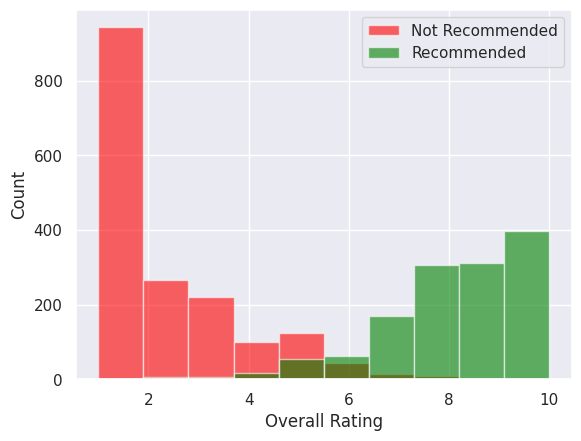

In [ ]:
# Create the histogram
for val, group in df_filtered_na.groupby('recommended'):
    label = "Recommended" if val == 1 else "Not Recommended"
    color = "green" if val == 1 else "red"
    group['overall'].hist(bins=10, alpha=0.6, label=label, color=color)

# Add labels and legend
plt.xlabel("Overall Rating")
plt.ylabel("Count")
plt.legend(title="")
plt.grid(True)
plt.show()

**TAKEAWAY**: Very significant difference in ratings between experiences with airlines that were recommended by passengers vs not recommended.

In [ ]:
# === STEP 0: Define column sets ===
num_cols = [
    'seat_comfort', 'cabin_staff', 'food_beverages',
    'inflight_entertainment', 'value_money'
]

cat_cols = ['cabin_flown', 'author_region', 'airline_name']
target_col = 'recommended'

# === STEP 1: Prepare dataframe with selected columns ===
df_model = df_filtered_na[num_cols + cat_cols + [target_col]].copy()

# Impute numerical columns with median
for col in num_cols:
    df_model[col] = df_model[col].fillna(df_model[col].median())

# Impute categorical columns with 'missing'
for col in cat_cols:
    df_model[col] = df_model[col].fillna('missing')

# === STEP 2: Set custom base categories dynamically ===
custom_bases = {
    'cabin_flown': 'Economy',
    'author_region': 'North America',
    'airline_name': 'united-airlines'
}

for col in custom_bases:
    all_cats = df_model[col].unique().tolist()
    if custom_bases[col] in all_cats:
        # Reorder so desired base is first
        new_order = [custom_bases[col]] + [c for c in all_cats if c != custom_bases[col]]
        df_model[col] = pd.Categorical(df_model[col], categories=new_order, ordered=True)

# === STEP 3: One-hot encode with drop_first to drop the custom base ===
df_encoded = pd.get_dummies(df_model, columns=cat_cols, drop_first=True)

# === STEP 4: Split into features and target ===
X = df_encoded.drop(columns=[target_col])
X = sm.add_constant(X)
X = X.astype(float)
y = df_encoded[target_col]

# === STEP 5: Fit logistic regression ===
model = sm.Logit(y, X)
result = model.fit()

# === STEP 6: Display summary ===
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.166670
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:            recommended   No. Observations:                 3261
Model:                          Logit   Df Residuals:                     3239
Method:                           MLE   Df Model:                           21
Date:                Sun, 08 Jun 2025   Pseudo R-squ.:                  0.7535
Time:                        01:37:45   Log-Likelihood:                -543.51
converged:                       True   LL-Null:                       -2204.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             -11.6964      0.521    -22.433  

### What predicts overall rating?

In [ ]:
# === STEP 0: Define column sets ===
num_cols = [
    'seat_comfort', 'cabin_staff', 'food_beverages',
    'inflight_entertainment', 'value_money'
]

cat_cols = ['cabin_flown', 'author_region', 'airline_name']
target_col = 'overall'  # now predicting this instead

# === STEP 1: Prepare dataframe with selected columns ===
df_model = df_filtered_na[num_cols + cat_cols + [target_col]].copy()
df_model = df_model[df_model[target_col].notnull()].copy()

# Impute numerical columns with median
for col in num_cols:
    df_model[col] = df_model[col].fillna(df_model[col].median())

# Impute categorical columns with 'missing'
for col in cat_cols:
    df_model[col] = df_model[col].fillna('missing')

# === STEP 2: Set custom base categories dynamically ===
custom_bases = {
    'cabin_flown': 'Economy',
    'author_region': 'North America',
    'airline_name': 'united-airlines'
}

for col in custom_bases:
    all_cats = df_model[col].unique().tolist()
    if custom_bases[col] in all_cats:
        # Reorder so desired base is first
        new_order = [custom_bases[col]] + [c for c in all_cats if c != custom_bases[col]]
        df_model[col] = pd.Categorical(df_model[col], categories=new_order, ordered=True)

# === STEP 3: One-hot encode with drop_first to drop the custom base ===
df_encoded = pd.get_dummies(df_model, columns=cat_cols, drop_first=True)

# === STEP 4: Split into features and target ===
X = df_encoded.drop(columns=[target_col])
X = sm.add_constant(X)
X = X.astype(float)
y = df_encoded[target_col]

# === STEP 5: Fit linear regression model ===
model = sm.OLS(y, X)
result = model.fit()

# === STEP 6: Display summary ===
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                overall   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     673.3
Date:                Sun, 08 Jun 2025   Prob (F-statistic):               0.00
Time:                        01:29:05   Log-Likelihood:                -5498.4
No. Observations:                3052   AIC:                         1.104e+04
Df Residuals:                    3030   BIC:                         1.117e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     